In [1]:
#https://www.kaggle.com/rodolfomendes/abalone-dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.gridspec as gridspec

matplotlib.style.use('tableau-colorblind10') 
sns.set_style("darkgrid")

%matplotlib inline

In [2]:
df = pd.read_csv('abalone.csv')

### Lets check the general format of the data and some information/statistics related to each column

In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [12]:
df.shape

(4177, 9)

#### We have 4177 rows of data and 9 columns defining each attribute of the albone.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [11]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


##### As we can see from this that 75% of albones have length, diameter and height below 0.480000, 0.165000, 1.153000 respectively. The maximum number of rings on an albone found are 29, meaning that as each ring signifies 1.5 years, the oldest albone is aged 43.5 years approximately but the average albone lives upto only 15 years approximately.  

##### Shucked weight means the weight of the albone after removing the shell, the Viscera weight is the weight of the albone's gut  and the Shell weight denotes shell weight after drying. Therefore, the weights might not add up. We can calculate the wet weight of the shell then, by subtracting the shucked weight from the total.

##### Lets add an age column to make it easier to visualize our data and for it to be more easier to read. We will drop the rings column afterwards.

In [3]:
df['Age'] = df['Rings'] + 1.5

In [4]:
df.drop('Rings',axis=1, inplace=True)

In [7]:
df.head(1)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,16.5


##### Lets get some more information from the data about its distribution relative to the attributes and visualize our data.

In [8]:
df.groupby('Sex').describe()['Length']
#the three sexes are Male, Female and Immature

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,1307.0,0.579093,0.086160,0.275,0.525,0.590,0.64,0.815
I,1342.0,0.427746,0.108858,0.075,0.360,0.435,0.51,0.725
M,1528.0,0.561391,0.102697,0.155,0.505,0.580,0.63,0.780


##### The data is somewhat equally distributed across the sex column, the 'F' and 'I' sex having about 1300 rows each while the 'M' sex has 1500 rows approximately.

##### This also shows that the mean length of the albones for 'M' and 'F' sex are relatively closer to each other than the 'I' sex and that female albones normally have greater length than the other two.

In [9]:
df.groupby('Sex').describe()['Diameter']

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,1307.0,0.454732,0.070954,0.195,0.410,0.465,0.505,0.65
I,1342.0,0.326494,0.088109,0.055,0.270,0.335,0.390,0.55
M,1528.0,0.439287,0.084398,0.110,0.395,0.455,0.500,0.63


##### The above table shows that the mean Diameter of the albones for 'M' and 'F' sex are relatively closer to each other than the 'I' sex and that female albones normally have greater diameter than the other two.

In [10]:
df.groupby('Sex').describe()['Height']

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,1307.0,0.158011,0.039984,0.015,0.140,0.160,0.175,1.130
I,1342.0,0.107996,0.031995,0.000,0.085,0.110,0.130,0.220
M,1528.0,0.151381,0.034804,0.025,0.130,0.155,0.175,0.515


##### The above table shows that the mean Height of the albones for 'M' and 'F' sex are relatively closer to each other than the 'I' sex and that female albones normally have greater diameter than the other two. The difference between the the max length between the albones based on sex is quite large as the females can grow upto 1.130 while the males can grow upto a maximum of 0.515 and the immature albones can be upto 0.220.

##### All the above tables cummulatively show that female albones are generally larger in size than male albones. Lets plot this to allow us to understand the data more easily.

In [11]:
mean_att = df.groupby('Sex').mean().transpose().drop('Age')

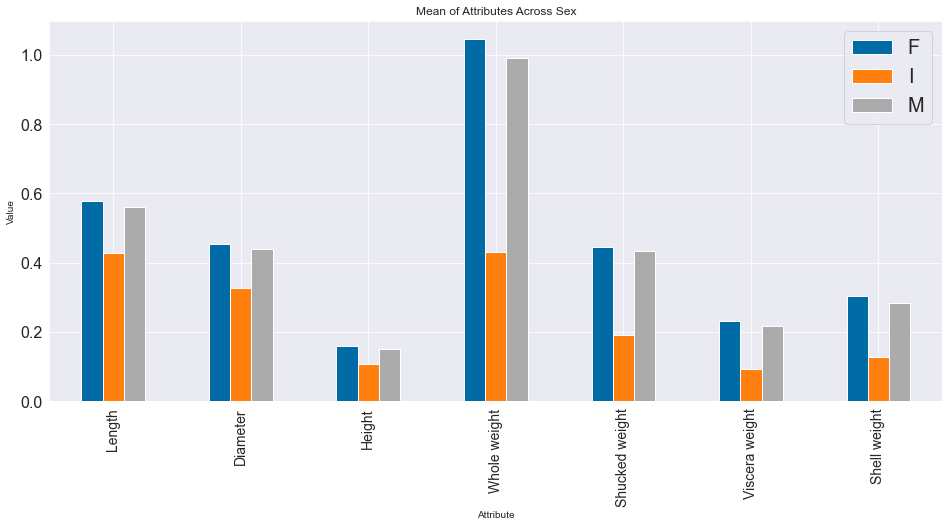

In [12]:
mean_att.plot.bar(figsize=(16,7))
plt.title("Mean of Attributes Across Sex")
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.xlabel("Attribute")
plt.ylabel("Value")
plt.legend(prop={'size':20})

##### This basically shows us all the data from the above table visually. Lets create some more visuals and find relations between the attributes

<AxesSubplot:xlabel='Whole weight', ylabel='Shucked weight'>

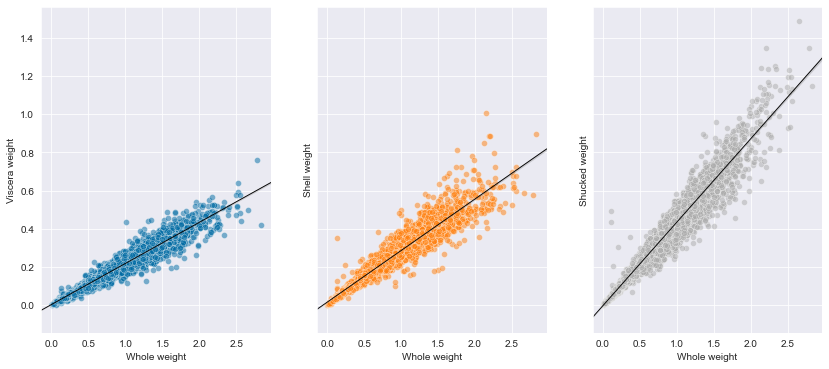

In [13]:
fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, sharey=True,figsize=(14,6))
sns.regplot(x=df['Whole weight'], y=df['Viscera weight'], 
            ax=ax1,scatter_kws={'edgecolor':'white', 'alpha':0.5, 'linewidth':0.5},
           line_kws={'color': 'black', 'linewidth':0.9})
sns.regplot(x=df['Whole weight'], y=df['Shell weight'], 
            ax=ax2,scatter_kws={'edgecolor':'white', 'alpha':0.5, 'linewidth':0.5},
           line_kws={'color': 'black', 'linewidth':0.9})
sns.regplot(x=df['Whole weight'], y=df['Shucked weight'], 
            ax=ax3, scatter_kws={'edgecolor':'white', 'alpha':0.5, 'linewidth':0.5},
           line_kws={'color': 'black', 'linewidth':0.9})

##### The above plot basically shows that there is a strong linear relationship between the Whole weight and Shell weight, Shucked weight and Viscera weight of the albone respectively.

[(0.0, 35.0), (0.0, 0.6)]

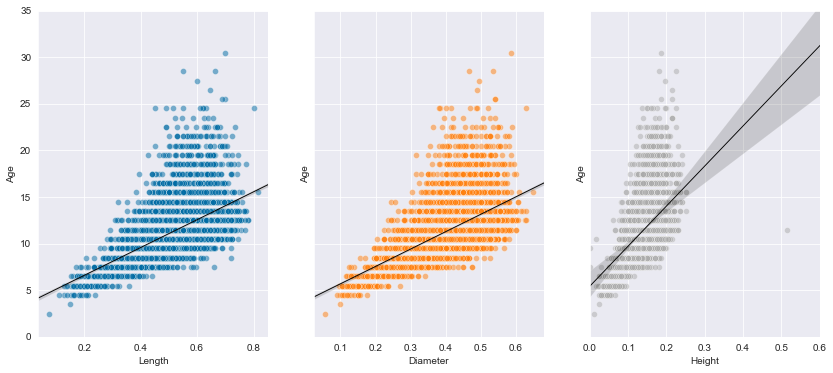

In [25]:
fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, sharey=True,figsize=(14,6))
g4= sns.regplot(y=df['Age'], x=df['Length'], 
            ax=ax1,scatter_kws={'edgecolor':'white', 'alpha':0.5, 'linewidth':0.5},
           line_kws={'color': 'black', 'linewidth':0.9})
g5= sns.regplot(y=df['Age'], x=df['Diameter'], 
            ax=ax2,scatter_kws={'edgecolor':'white', 'alpha':0.5, 'linewidth':0.5},
           line_kws={'color': 'black', 'linewidth':0.9})
g6= sns.regplot(y=df['Age'], x=df['Height'], 
            ax=ax3, scatter_kws={'edgecolor':'white', 'alpha':0.5, 'linewidth':0.5},
           line_kws={'color': 'black', 'linewidth':0.9})

g4.set(ylim=(0, 35))
g5.set(ylim=(0, 35))
g6.set(ylim=(0, 35) , xlim=(0,0.6))


##### The above plot shows that there is a some sort of weak linear relationship between the Age and Length, Diameter and Height of the albone respectively.

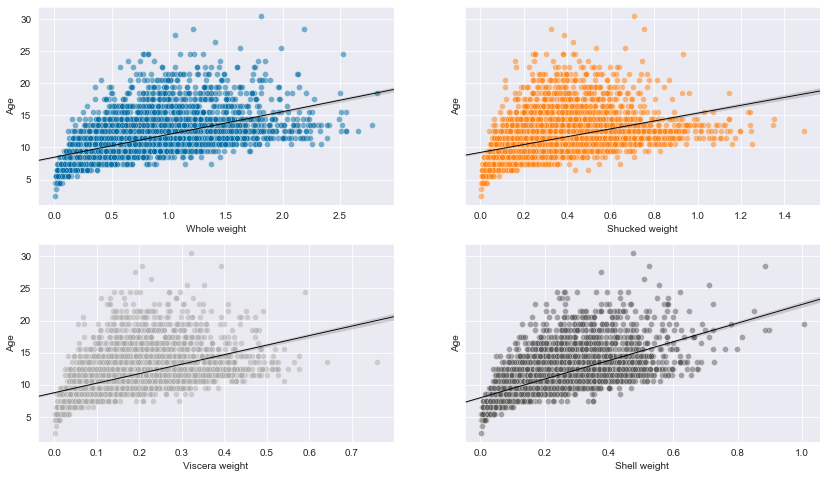

In [30]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharey=True,figsize=(14,8))
g7= sns.regplot(y=df['Age'], x=df['Whole weight'], 
            ax=ax1,scatter_kws={'edgecolor':'white', 'alpha':0.5, 'linewidth':0.5},
           line_kws={'color': 'black', 'linewidth':0.9})
g8= sns.regplot(y=df['Age'], x=df['Shucked weight'], 
            ax=ax2,scatter_kws={'edgecolor':'white', 'alpha':0.5, 'linewidth':0.5},
           line_kws={'color': 'black', 'linewidth':0.9})
g9= sns.regplot(y=df['Age'], x=df['Viscera weight'], 
            ax=ax3, scatter_kws={'edgecolor':'white', 'alpha':0.5, 'linewidth':0.5},
           line_kws={'color': 'black', 'linewidth':0.9})
g10= sns.regplot(y=df['Age'], x=df['Shell weight'], 
            ax=ax4, scatter_kws={'edgecolor':'white', 'alpha':0.5, 'linewidth':0.5},
           line_kws={'color': 'black', 'linewidth':0.9})

#g7.set(ylim=(0, 35))
#g8.set(ylim=(0, 35))
#g9.set(ylim=(0, 35) , xlim=(0,0.6))

##### The above figure plots out the relationship between the weights and the age. As you can see, there are many outliers which we will clean afterwards.

##### Now, lets plot the correlation between the attributes as calculated by Pandas.

In [26]:
df.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Age'],
      dtype='object')

<AxesSubplot:>

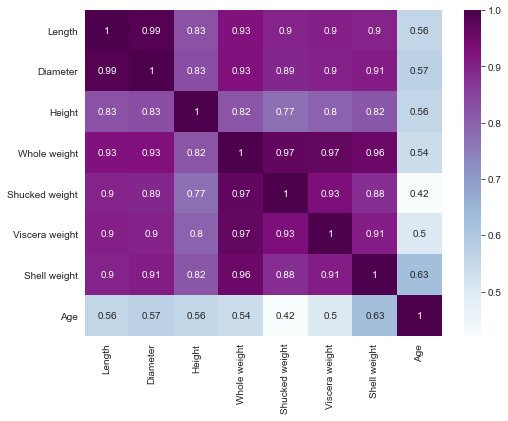

In [16]:
plt.figure(figsize = (8,6))
corr = df.corr()
sns.heatmap(corr, annot = True, cmap="BuPu")

##### Lets process our data a little more to work with the models from sklearn library.

##### First, we will drop the Sex column as it does not affect the age of the albone.

In [20]:
df.drop('Sex', axis = 1, inplace = True)

##### As previously mentioned, there are many outliers. These will hinder the working of our models so lets take them out.

##### Below, we will create filters and show the expected outcome in a plot.

### Filter 1 - Viscera Weight

In [5]:
#Filter 1

#This will filter the albones which have Viscera weight greater than 0.55 and age less than 20
df.drop(df[(df['Viscera weight']> 0.55) & (df['Age'] < 20)].index, inplace=True)

#This will filter the albones which have Viscera weight less than 0.50 and age greater than 25
df.drop(df[(df['Viscera weight']<0.5) & (df['Age'] > 25)].index, inplace=True)

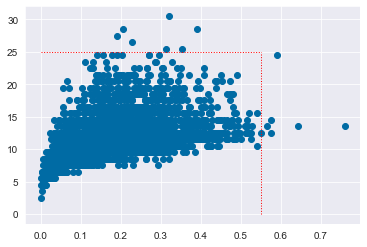

In [57]:
plt.scatter(y=df['Age'], x=df['Viscera weight'])
plt.hlines(y=25, xmin=0, xmax=0.55, linewidth=1, color='r', linestyle=':')
plt.vlines(x=0.55, ymin=0, ymax=25, linewidth=1, color='r', linestyle=':')

### Filter 2 -- Shell Weight

In [6]:
#Filter 2
#This will filter the albones which have Shell weight greater than 0.70 and age less than 25
df.drop(df[(df['Shell weight']> 0.75) & (df['Age'] < 25)].index, inplace=True)

#This will filter the albones which have Shell weight less than 0.80 and age greater than 25
df.drop(df[(df['Shell weight']<0.75) & (df['Age'] > 25)].index, inplace=True)

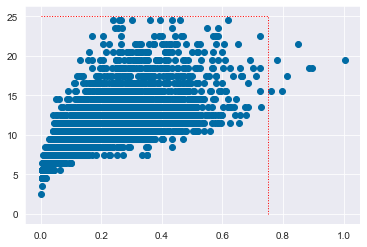

In [77]:
plt.scatter(y=df['Age'], x=df['Shell weight'])
plt.hlines(y=25, xmin=0, xmax=0.75, linewidth=1, color='r', linestyle=':')
plt.vlines(x=0.75, ymin=0, ymax=25, linewidth=1, color='r', linestyle=':')

### Filter 3 -- Shucked Weight

In [7]:
#Filter 3
#This will filter the albones which have Shuck weight greater/equal to 1.10 and age less than 20
df.drop(df[(df['Shucked weight']>= 1.1) & (df['Age'] < 20)].index, inplace=True)

#This will filter the albones which have Shuck weight less than 1.0 and age greater than 25
df.drop(df[(df['Shucked weight']<1) & (df['Age'] > 25)].index, inplace=True)

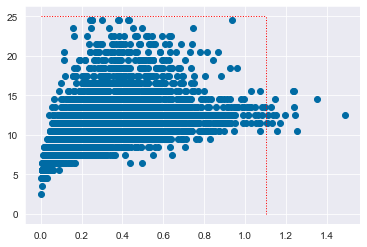

In [82]:
plt.scatter(y=df['Age'], x=df['Shucked weight'])
plt.hlines(y=25, xmin=0, xmax=1.1, linewidth=1, color='r', linestyle=':')
plt.vlines(x=1.1, ymin=0, ymax=25, linewidth=1, color='r', linestyle=':')

### Filter 4 -- Whole Weight

In [8]:
#Filter 4
#This will filter the albones which have whole weight greater/equal to 2.4 and age less than 25
df.drop(df[(df['Whole weight']>= 2.4 ) & (df['Age'] < 25)].index, inplace=True)

#This will filter the albones which have Whole weight less than 5.5 and age greater than 25
df.drop(df[(df['Whole weight']< 2.5) & (df['Age'] > 25)].index, inplace=True)

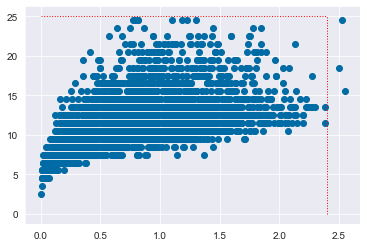

In [13]:
plt.scatter(y=df['Age'], x=df['Whole weight'])
plt.hlines(y=25, xmin=0, xmax=2.4, linewidth=1, color='r', linestyle=':')
plt.vlines(x=2.4, ymin=0, ymax=25, linewidth=1, color='r', linestyle=':')

### Filter 5 -- Diameter

In [9]:
#Filter 5
#This will filter the albones which have Diameter greater/equal to 0.6 and age less than 25
df.drop(df[(df['Diameter']>= 0.6 ) & (df['Age'] < 25)].index, inplace=True)

#This will filter the albones which have Diameter less than 0.6 and age greater than 25
df.drop(df[(df['Diameter']< 0.6) & (df['Age'] > 25)].index, inplace=True)

#This will filter the albones which have Diameter less than 0.1 and age greater than 5
df.drop(df[(df['Diameter']< 0.1) & (df['Age'] < 5)].index, inplace=True)

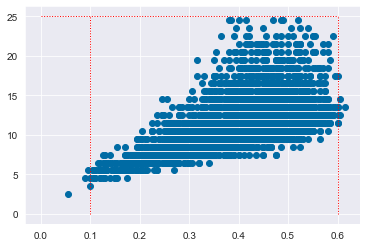

In [21]:
plt.scatter(y=df['Age'], x=df['Diameter'])
plt.hlines(y=25, xmin=0, xmax=0.6, linewidth=1, color='r', linestyle=':')
plt.vlines(x=0.1, ymin=0, ymax=25, linewidth=1, color='r', linestyle=':')
plt.vlines(x=0.6, ymin=0, ymax=25, linewidth=1, color='r', linestyle=':')

### Filter 6 -- Height

In [10]:
#Filter 6
#This will filter the albones which have Height greater to 0.4 and age less than 20
df.drop(df[(df['Shucked weight']> 0.4) & (df['Age'] < 20)].index, inplace=True)

#This will filter the albones which have Height less than 1.0 and age greater than 25
df.drop(df[(df['Shucked weight']< 0.4) & (df['Age'] > 25)].index, inplace=True)

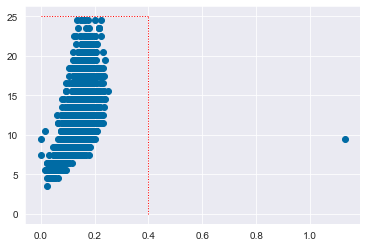

In [28]:
plt.scatter(y=df['Age'], x=df['Height'])
plt.hlines(y=25, xmin=0, xmax=0.4, linewidth=1, color='r', linestyle=':')
plt.vlines(x=0.4, ymin=0, ymax=25, linewidth=1, color='r', linestyle=':')

### Filter -- 6 Length

In [11]:
#Filter 5
#This will filter the albones which have Length greater/equal to 0.6 and age less than 25
df.drop(df[(df['Length']>= 0.7 ) & (df['Age'] < 25)].index, inplace=True)

#This will filter the albones which have Length less than 0.6 and age greater than 25
df.drop(df[(df['Length']< 0.7) & (df['Age'] > 25)].index, inplace=True)

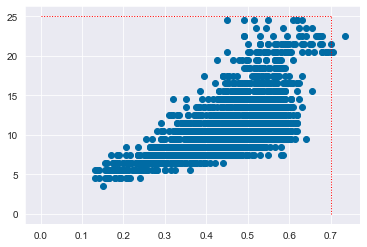

In [34]:
plt.scatter(y=df['Age'], x=df['Length'])
plt.hlines(y=25, xmin=0, xmax=0.7, linewidth=1, color='r', linestyle=':')
plt.vlines(x=0.7, ymin=0, ymax=25, linewidth=1, color='r', linestyle=':')

##### Of the initial data of 4177 rows, we are now left with 2541 rows. This should show that processing and cleaning data takes a whole lot of work as well as the data itself. Cleaning out outliers is the better option as it makes a better model than the with the outliers as that might create a lot of noise.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2541 entries, 0 to 4172
Data columns (total 9 columns):
Sex               2541 non-null object
Length            2541 non-null float64
Diameter          2541 non-null float64
Height            2541 non-null float64
Whole weight      2541 non-null float64
Shucked weight    2541 non-null float64
Viscera weight    2541 non-null float64
Shell weight      2541 non-null float64
Age               2541 non-null float64
dtypes: float64(8), object(1)
memory usage: 198.5+ KB


##### Now lets work on scalling our data for a better model, splitting our data into training and testing.

In [12]:
X = df.drop(['Age','Sex'], axis = 1) 
y = df['Age']

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
scaler.fit_transform(X)

array([[-0.01310264,  0.1522535 , -0.64513917, ...,  0.06426644,
        -0.20450503, -0.11356669],
       [-1.05976409, -1.0484794 , -0.77617823, ..., -1.00929136,
        -0.99089621, -0.95192371],
       [ 0.73451268,  0.81265659,  0.40317331, ...,  0.33909724,
         0.40213959,  0.51520107],
       ...,
       [ 0.93387677,  0.93272988,  0.27213425, ...,  0.84581652,
         1.21099908,  0.83482468],
       [ 1.03355881,  0.93272988,  0.92732955, ...,  1.57154159,
         0.85899541,  0.71431086],
       [ 1.08339983,  1.17287646,  1.18940767, ...,  1.31388772,
         1.86258034,  0.92390011]])

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

##### Now, as we will be working with multiple models lets create a function which takes multiple inputs and outputs the training/testing score as well as cross validation score.

In [16]:
from sklearn.model_selection import cross_val_score
def cross_eval(model, X, y,):
    rmse =- (cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5))
    return(rmse*100)

In [36]:
#[train_score,test_score]
def scores(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    return(model_train_score,model_test_score)

##### Lets import our models for our (first) step.

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.svm import SVR

In [27]:
mds = [LinearRegression(),
       KNeighborsRegressor(n_neighbors = 40),
       RandomForestRegressor(),
       GradientBoostingRegressor(),
       Ridge(),
       SVR(),
      ]

md_label = ['LR','KNN','RF','GB','RIDGE','SVM']

In [42]:
print('Cross Eval Score For Each Model')
for md,label in zip(mds,md_label):
    score = cross_eval(md,X_train,y_train)
    print("{}    : {:.6f}, {:4f}".format(label,score.mean(),score.std()))

Cross Eval Score For Each Model
LR    : 500.357416, 67.699814
KNN    : 458.681666, 35.180230
RF    : 459.615624, 42.055285
GB    : 457.603463, 39.021605
RIDGE    : 491.425263, 41.368041
SVM    : 461.135805, 44.149936


In [41]:
print('Train/Test/Accuracy Score For Each Model')
for md,label in zip(mds,md_label):
    model_train_score,model_test_score = scores(md, X_train, X_test, y_train, y_test)
    print("{}    : {:.5f}, {:4f}".format(label,model_train_score,model_test_score))

Train/Test/Accuracy Score For Each Model
LR    : 0.60593, 0.631862
KNN    : 0.63893, 0.631030
RF    : 0.94812, 0.637334
GB    : 0.76354, 0.631547
RIDGE    : 0.59267, 0.610770
SVM    : 0.62137, 0.638875


##### As you can see from the above metrics, some models have great score while others don't. Lets also create a ridge regressor with hyperparameter's tuned using GridSearchCV.

In [43]:
from sklearn.model_selection import  GridSearchCV

In [44]:
params_Ridge = {'alpha': [1,0.1,0.01,0.001,0.0001,0,10,100] ,
                "fit_intercept": [True, False],
                "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

ridge_hyper = GridSearchCV(estimator = Ridge(random_state=10,), param_grid = params_Ridge, n_jobs = -1, cv=5)

##### Here we fit our GridSearchCV Ridge Regressor with the data and find the best parameters to create our model.

In [46]:
ridge_hyper.fit(X_train, y_train)
ridge_hyper.best_params_

{'alpha': 0.1, 'fit_intercept': True, 'solver': 'saga'}

##### Now that we have our parameters, lets create our model with these.

In [48]:
ridge_best = Ridge(random_state=3, **ridge_hyper.best_params_)

In [49]:
all_accuracies = cross_val_score(estimator=ridge_best, X=X_train, y=y_train, cv=5)

In [52]:
print('Our score for the training data with the tuned ridge regressor is: ',all_accuracies.mean())

Our score for the training data with the tuned ridge regressor is:  0.5869380277362469


In [55]:
from sklearn.metrics import mean_squared_error,r2_score
ridge_best.fit(X_train,y_train)

predictions = ridge_best.predict(X_test)

In [64]:
print('Our score for the testing data with the tuned ridge regressor is: ',ridge_best.score(X_test,y_test))
print('RMSE : {}'.format(mean_squared_error(y_test.values, predictions).round(4)))

Our score for the testing data with the tuned ridge regressor is:  0.6290560840763565
RMSE : 4.4189


##### Lets also plot the feature importance to know what features to take out if we want to.

Text(0, 0.5, 'Feature Importance Score')

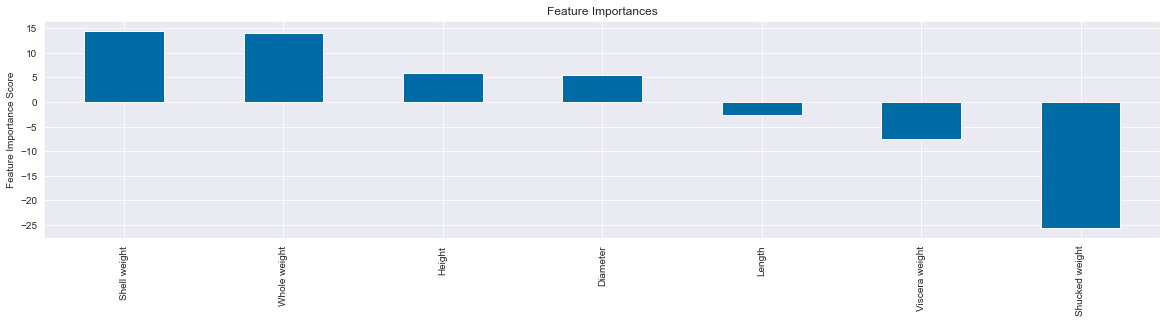

In [67]:
feature_imp = pd.Series(ridge_best.coef_, X.columns).sort_values(ascending=False)
plt.figure(figsize=(20,4))
feature_imp.plot(kind='bar', title='Feature Importances',)
plt.ylabel('Feature Importance Score')

##### This shows that our model might be better of with some of the columns from the data removed.

### Anyway, lets move on. Now we will change our approach a little. 
##### Instead of using the age column as is, we will change it in either 1 or 0 based on a condition where if the value is greater than the mean value, replace it with 1, else 0. This will take us into the classification category and our model might be better of in this form.

In [70]:
df['Age'].mean().round(2)

10.8

In [73]:
df['Age_classified'] = (df['Age'] > 10.8).astype(int)

In [75]:
df.head(2)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age,Age_classified
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,16.5,1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,8.5,0


In [77]:
df['Age_classified'].value_counts()

0    1611
1     930
Name: Age_classified, dtype: int64

##### Lets scale our data and split into training and testing set.

In [78]:
X_class = df.drop(['Age','Sex','Age_classified'], axis = 1) 
y_class = df['Age_classified']

In [79]:
scaler_class = StandardScaler()
scaler_class.fit_transform(X_class)

array([[-0.01310264,  0.1522535 , -0.64513917, ...,  0.06426644,
        -0.20450503, -0.11356669],
       [-1.05976409, -1.0484794 , -0.77617823, ..., -1.00929136,
        -0.99089621, -0.95192371],
       [ 0.73451268,  0.81265659,  0.40317331, ...,  0.33909724,
         0.40213959,  0.51520107],
       ...,
       [ 0.93387677,  0.93272988,  0.27213425, ...,  0.84581652,
         1.21099908,  0.83482468],
       [ 1.03355881,  0.93272988,  0.92732955, ...,  1.57154159,
         0.85899541,  0.71431086],
       [ 1.08339983,  1.17287646,  1.18940767, ...,  1.31388772,
         1.86258034,  0.92390011]])

In [80]:
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size = 0.3)

##### Lets import our models for the classified data.

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

##### Lets first find the value for K to choose where the error is the lowest.

In [83]:
n_range = range(1, 100)
error_rate_class = []

for n in n_range:
    knn_class = KNeighborsClassifier(n_neighbors=n)
    knn_class.fit(X_train_class, y_train_class)
    y_pred_class = knn_class.predict(X_test_class)
    error_rate_class.append(np.mean(y_pred_class != y_test_class))

Text(0.5, 1.0, 'Value of K for KNN VS Error')

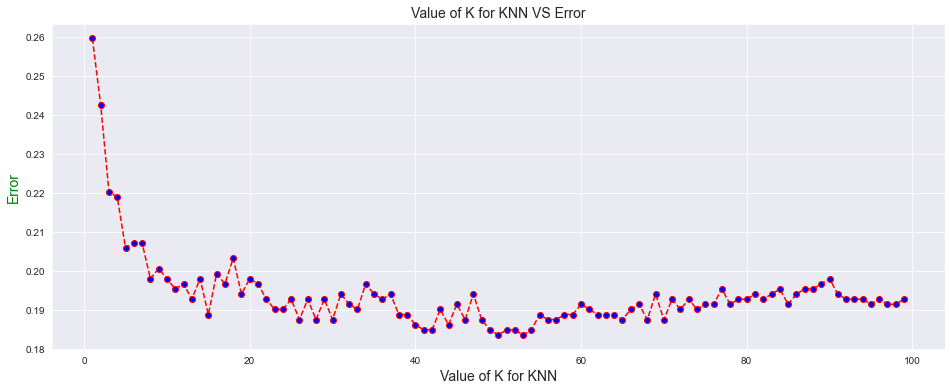

In [84]:
fig, ax1 = plt.subplots(figsize=(16,6))

ax1.plot(n_range, error_rate_class, 'r-',linestyle='dashed',marker='o',markerfacecolor='blue')

ax1.set_xlabel('Value of K for KNN', fontsize=14)
ax1.set_ylabel('Error', color='g', fontsize=14)
plt.title('Value of K for KNN VS Error', fontsize=14)

##### The value for k with the lowest error as seen from the figure is 50. 

##### Now lets choose the best value for the max_depth for decision tree, random forest classifier and GradientBoostingClassifier.

In [105]:
n_range_depth = range(1, 150)
error_rate_class_depth_dt = []
error_rate_class_depth_rf = []
error_rate_class_depth_GB = []


for n in n_range_depth:
    DT_class = DecisionTreeClassifier(max_depth = n)
    RT_class = RandomForestClassifier(n_estimators= 150, max_depth= n)
    GB_class = GradientBoostingClassifier(n_estimators= 250, max_depth = n, min_samples_leaf= 2)
    
    DT_class.fit(X_train_class, y_train_class)
    RT_class.fit(X_train_class, y_train_class)
    GB_class.fit(X_train_class, y_train_class)
    
    y_pred_class_dt = DT_class.predict(X_test_class)
    y_pred_class_rf = RT_class.predict(X_test_class)
    y_pred_class_gb = GB_class.predict(X_test_class)
    
    error_rate_class_depth_dt.append(np.mean(y_pred_class_dt != y_test_class))
    error_rate_class_depth_rf.append(np.mean(y_pred_class_rf != y_test_class))
    error_rate_class_depth_GB.append(np.mean(y_pred_class_gb != y_test_class))

Text(0.5, 1.0, 'Value of max_depth for DT VS Error')

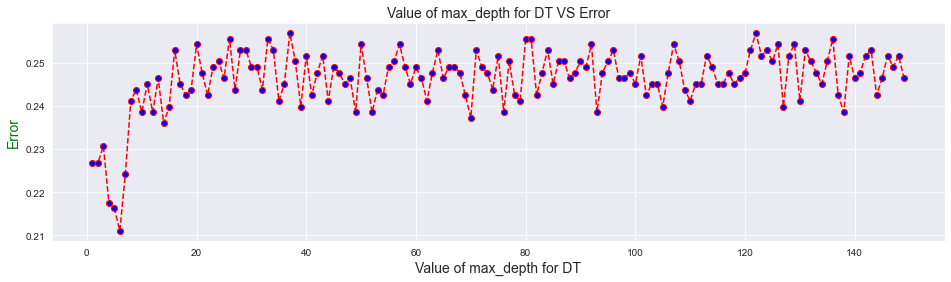

In [101]:
fig_dt, ax1_dt = plt.subplots(figsize=(16,4))

ax1_dt.plot(n_range_depth, error_rate_class_depth_dt, 'r-',linestyle='dashed',marker='o',markerfacecolor='blue')

ax1_dt.set_xlabel('Value of max_depth for DT', fontsize=14)
ax1_dt.set_ylabel('Error', color='g', fontsize=14)

plt.title('Value of max_depth for DT VS Error', fontsize=14)

##### AS you can see, the best value of max_depth for the Decision Tree Classifier is 6.

Text(0.5, 1.0, 'Value of max_depth for RF VS Error')

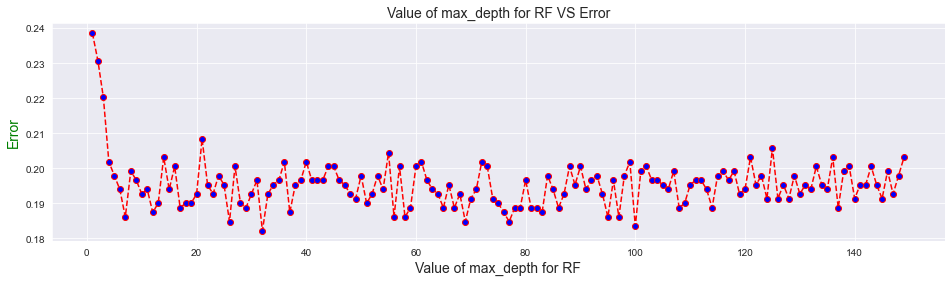

In [102]:
fig_rf, ax1_rf = plt.subplots(figsize=(16,4))

ax1_rf.plot(n_range_depth, error_rate_class_depth_rf, 'r-',linestyle='dashed',marker='o',markerfacecolor='blue')

ax1_rf.set_xlabel('Value of max_depth for RF', fontsize=14)
ax1_rf.set_ylabel('Error', color='g', fontsize=14)

plt.title('Value of max_depth for RF VS Error', fontsize=14)

##### For the Random Forest Classifier, the best value of max_depth is 32.

Text(0.5, 1.0, 'Value of max_depth for GB VS Error')

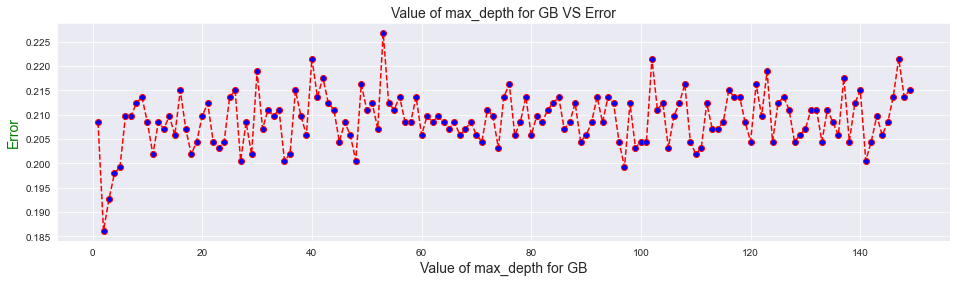

In [106]:
fig_rf, ax1_gb = plt.subplots(figsize=(16,4))

ax1_gb.plot(n_range_depth, error_rate_class_depth_GB, 'r-',linestyle='dashed',marker='o',markerfacecolor='blue')

ax1_gb.set_xlabel('Value of max_depth for GB', fontsize=14)
ax1_gb.set_ylabel('Error', color='g', fontsize=14)

plt.title('Value of max_depth for GB VS Error', fontsize=14)

##### For the GradientBoostingClassifier, the best value of max_depth is 2.

##### Now lets evaluate our models using the previously created functions and the parameters.

In [112]:
mds_class = [LogisticRegression(),
           KNeighborsClassifier(n_neighbors = 50),
           SVC(),
           DecisionTreeClassifier(max_depth = 6),
           RandomForestClassifier(n_estimators= 150, max_depth= 32),
           AdaBoostClassifier(n_estimators= 100),
           GradientBoostingClassifier(n_estimators= 250, max_depth = 2, min_samples_leaf= 2),
           XGBClassifier(objective = "binary:logistic", n_estimators = 150, max_depth = 3,
                        colsample_bytree = 0.6, learning_rate = 0.01, subsample = 0.8, min_child_weight=3)
          ]

md_class_label = ['LR','KNN_C','SVC','DT_C','RF_C','AdB_C','GB_C','XGB']

In [113]:
print('Cross Eval Score For Each Model')
for md_class,label_class in zip(mds_class,md_class_label):
    score_class = cross_eval(md_class,X_train_class,y_train_class)
    print("{}    : {:.6f}, {:4f}".format(label_class,score_class.mean(),score_class.std()))

Cross Eval Score For Each Model
LR    : 22.608957, 2.525162
KNN_C    : 19.740149, 1.571761
SVC    : 18.784934, 1.208379
DT_C    : 23.566071, 1.293424
RF_C    : 19.290236, 1.071143
AdB_C    : 21.596139, 2.164393
GB_C    : 19.909321, 1.265892
XGB    : 19.065200, 1.669644


In [114]:
print('Train/Test score For Each Model')
for md_class,label_class in zip(mds_class,md_class_label):
    model_train_score_class,model_test_score_class = scores(md_class, X_train_class, X_test_class, y_train_class, y_test_class)
    print("{}    : {:.5f}, {:4f}".format(label_class,model_train_score_class,model_test_score_class))

Train/Test score For Each Model
LR    : 0.77953, 0.779817
KNN_C    : 0.81384, 0.816514
SVC    : 0.81271, 0.809961
DT_C    : 0.85039, 0.790301
RF_C    : 1.00000, 0.802097
AdB_C    : 0.82846, 0.800786
GB_C    : 0.86670, 0.813893
XGB    : 0.82733, 0.802097


##### From this, we can see that by classifying our data, our model is giving better output. The mean age which was used to create the condition for the classification might also be the age which marks that either the albone is grown and harvestable or not.

##### Another thing you might notice from the train/test scores is that the random forest classifier is clearly badly overfiting to the training data.

### That will be all from this project. 
(?? To increase the performance of the model, you can change the filter values to include more data and remove less. It might?? be helpful)